### Analyze This 2019

##### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#!pip install xlrd

##### Loading Dataset

In [4]:
url_train = './Dataset/development_dataset.csv' #traing dataset
url_lead = './Dataset/leaderboard_dataset.csv' #leaderboard dataset
url_dict = './Dataset/Data_Dictionary.xlsx' #data dictionary

In [5]:
## making dataframe

df_train = pd.read_csv(url_train)
df_lead = pd.read_csv(url_lead)
df_dict = pd.read_excel(url_dict)

##### Data exploration and visualization 

In [6]:
df_dict

,Unnamed: 0,Variable Name,Definition
0,VAR1,ID,The identifier for the account
1,VAR2,FICO,Credit score associated with account. Takes in...
2,VAR3,Business Revenue,Reported annual business revenue
3,VAR4,TSR,Risk score associated with probability of defa...
4,VAR5,Last 6M Avg Util,Average utilization of credit line in the last...
5,VAR6,Income,Reported annual business income
6,VAR7,Last 6M Avg Remit,Average amount paid towards card bills in the ...
7,VAR8,Last 6M Avg Bal,Average balance on each card in the last 6 months
8,VAR9,Internal Revolve,The average daily balance as a percentage of c...
9,VAR10,Lending AR% in last 6M,Percentage of internal balance (with XYZEE) on...


In [7]:
df_train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.0,1,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High


In [8]:
df_lead.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
0,1,878.823529,0.833333,821.428571,620.835806,5.181818,0.833974,197.500187,NaN,58.632548,9.433609,40.033361,10.000000,2,10.000000,1.212784,1000.00,1,0,48.099828
1,2,891.764706,0.138889,357.142857,614.092215,3.909091,0.595187,197.016843,253.896073,58.632548,10.144612,NaN,5.666667,1,7.600000,1.004907,992.55,0,0,104.018933
2,3,955.294118,0.055556,NaN,611.574748,6.363636,0.918652,197.660051,22.086661,NaN,0.583494,NaN,6.000000,1,6.000000,1.157115,NaN,1,1,120.586919
3,4,831.764706,0.111111,250.000000,617.740617,6.545455,2.383924,200.526288,NaN,48.539365,NaN,NaN,NaN,3,NaN,2.350858,NaN,0,1,168.592083
4,5,957.647059,0.166667,NaN,623.426802,NaN,0.711240,197.151458,5.013668,49.379748,0.255712,NaN,13.333333,1,13.333333,1.171551,NaN,0,1,109.204819


In [9]:
df_train.size

714000

In [10]:
print('df_train_shape',df_train.shape)
print('df_dict_shape',df_dict.shape)

df_train_shape (34000, 21)
df_dict_shape (27, 3)


In [11]:
df_train.describe()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
count,34000.000000,33039.000000,30615.000000,21506.000000,33999.000000,30505.000000,33165.000000,33165.000000,18183.000000,29450.000000,26435.000000,23498.000000,25478.000000,25976.000000,33134.000000,11806.000000,34000.000000,34000.000000,34000.000000
mean,17000.500000,917.391603,1.119596,248.076201,631.571391,15.290028,2.055295,200.007169,53.988554,56.497320,5.429062,117.283667,11.679589,12.453257,2.092006,821.281092,0.400029,0.298059,161.355950
std,9815.098913,50.222389,12.714724,241.167723,30.863288,29.123815,8.960891,11.282223,84.573655,6.861058,11.433905,120.628594,11.063966,12.084965,8.051804,262.338240,0.684850,0.457412,123.231136
min,1.000000,730.588235,0.001333,18.928571,347.053355,0.005000,0.353228,0.000000,0.004278,13.028620,0.000693,0.834028,0.082667,0.133333,0.959315,0.130000,0.000000,0.000000,0.000000
25%,8500.750000,882.352941,0.083333,71.428571,611.691167,6.636364,0.691201,197.196716,8.784613,57.458373,0.638239,15.012510,5.666667,6.666667,1.040125,732.662500,0.000000,0.000000,104.385542
50%,17000.500000,924.705882,0.166667,142.857143,619.802909,10.000000,0.998093,197.912501,22.086661,58.632548,2.098360,80.066722,10.000000,10.000000,1.262747,965.345000,0.000000,0.000000,117.493115
75%,25500.250000,956.470588,0.555556,357.142857,637.450565,18.181818,1.735250,199.687427,58.559811,58.632548,6.043179,193.494579,15.333333,16.400000,1.827486,1000.000000,1.000000,1.000000,159.446213
max,34000.000000,1000.000000,1000.000000,1000.000000,1000.000000,909.090818,681.582083,1000.000000,993.061289,1000.000000,824.334457,1000.000000,775.000000,775.000000,1000.000000,1000.000000,14.000000,1.000000,1000.000000


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34000 entries, 0 to 33999
Data columns (total 21 columns):
VAR1     34000 non-null int64
VAR2     33039 non-null float64
VAR3     30615 non-null float64
VAR4     21506 non-null float64
VAR5     33999 non-null float64
VAR6     30505 non-null float64
VAR7     33165 non-null float64
VAR8     33165 non-null float64
VAR9     18183 non-null float64
VAR10    29450 non-null float64
VAR11    26435 non-null float64
VAR12    23498 non-null float64
VAR13    25478 non-null float64
VAR14    34000 non-null object
VAR15    25976 non-null float64
VAR16    33134 non-null float64
VAR17    11806 non-null float64
VAR18    34000 non-null int64
VAR19    34000 non-null int64
VAR20    34000 non-null float64
VAR21    34000 non-null object
dtypes: float64(16), int64(3), object(2)
memory usage: 5.4+ MB


In [13]:
#df_train.describe

In [14]:
df_lead.describe()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
count,10000.00000,9733.000000,9063.000000,6314.000000,10000.000000,8942.000000,9785.000000,9785.000000,5299.000000,8652.000000,7769.000000,6799.000000,7507.000000,7641.000000,9771.000000,3457.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,917.904763,1.222283,244.745633,631.374549,15.185077,1.947810,199.913487,52.961466,56.432554,5.326532,114.775746,11.900945,12.720950,1.992517,821.796838,0.400600,0.302500,161.013031
std,2886.89568,50.534988,13.254280,240.709776,30.892544,30.895939,5.081216,8.536389,81.424117,4.097975,14.614213,120.012642,16.276969,17.203552,3.904421,262.824441,0.716778,0.459364,122.318602
min,1.00000,725.882353,0.001333,34.642857,295.765648,0.008727,0.559710,191.443507,0.081280,2.101494,0.000693,0.834028,0.054000,0.054000,0.959315,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,881.176471,0.083333,71.428571,611.683289,6.636364,0.689715,197.193266,8.780335,57.137997,0.647248,15.012510,5.666667,6.666667,1.039381,733.120000,0.000000,0.000000,104.438038
50%,5000.50000,925.882353,0.166667,142.857143,619.838798,10.000000,1.005260,197.904229,22.086661,58.632548,2.105289,80.066722,10.000000,10.133333,1.267686,966.590000,0.000000,0.000000,117.569707
75%,7500.25000,957.647059,0.555556,357.142857,637.280750,18.181818,1.734506,199.628377,59.642113,58.632548,6.053920,188.490409,15.333333,16.600000,1.826885,1000.000000,1.000000,1.000000,160.002151
max,10000.00000,1000.000000,1000.000000,1000.000000,957.849053,909.090818,224.722562,475.687040,931.742250,93.177335,1000.000000,990.825688,1000.000000,1000.000000,187.777811,1000.000000,23.000000,1.000000,1000.000000


#### Class Information

Text(0, 0.5, 'Frequency')

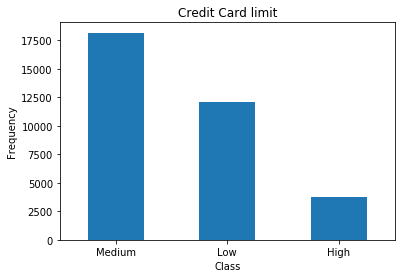

In [15]:
count_classes = pd.value_counts(df_train['VAR21'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Credit Card limit")
#plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

### Data Preprocessing 

##### Missing data hendelling

In [16]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

In [17]:
df_with_any_null_values = df_train[df_train.columns[df_train.isnull().any()].tolist()]

lead_df_with_any_null_values = df_lead[df_lead.columns[df_lead.isnull().any()].tolist()]

In [18]:
get_percentage_missing(df_with_any_null_values)

VAR2     0.03
VAR3     0.10
VAR4     0.37
VAR5     0.00
VAR6     0.10
VAR7     0.02
VAR8     0.02
VAR9     0.47
VAR10    0.13
VAR11    0.22
VAR12    0.31
VAR13    0.25
VAR15    0.24
VAR16    0.03
VAR17    0.65
dtype: float64

In [19]:
get_percentage_missing(lead_df_with_any_null_values)

VAR2     0.03
VAR3     0.09
VAR4     0.37
VAR6     0.11
VAR7     0.02
VAR8     0.02
VAR9     0.47
VAR10    0.13
VAR11    0.22
VAR12    0.32
VAR13    0.25
VAR15    0.24
VAR16    0.02
VAR17    0.65
dtype: float64

In [20]:
del df_train['VAR9']
del df_train['VAR17']

del df_lead['VAR9']
del df_lead['VAR17']

In [21]:
df_train = df_train.replace(to_replace = '.', value =np.nan)

df_lead = df_lead.replace(to_replace = '.', value =np.nan)

In [22]:
features = list(df_dict['Variable Name'][:21])
all_columns = df_train.columns.tolist()
features

['ID',
 'FICO',
 'Business Revenue',
 'TSR',
 'Last 6M Avg Util',
 'Income',
 'Last 6M Avg Remit',
 'Last 6M Avg Bal',
 'Internal Revolve',
 'Lending AR% in last 6M',
 'ExternalBalance',
 'Months in Business',
 'preferred_spend_line',
 'total_cards',
 'preferred_bal_line',
 'preavgremit1_3_all',
 'External_rev_rate',
 'Supplementary Cards',
 'isChargeCust',
 'CMV',
 'Assigned Line']

In [23]:
features.remove('Internal Revolve') #index
features.remove('External_rev_rate') #target
print(len(features))

19


In [24]:
len(all_columns)

19

In [25]:
df_var = pd.DataFrame(list(zip(all_columns,features)), 
               columns =['column', 'description'])
df_var.head()

,column,description
0,VAR1,ID
1,VAR2,FICO
2,VAR3,Business Revenue
3,VAR4,TSR
4,VAR5,Last 6M Avg Util


In [26]:
#Relevent columns
columns = all_columns
#type(columns)
columns.remove('VAR1') #index
columns.remove('VAR21') #target
columns.remove('VAR14') #categorical
#columns

In [27]:
type(df_train['VAR2'])

pandas.core.series.Series

##### plotting columns to remove outliers, find best way to fill missing value, scaling and normalizing the data

In [28]:
#df_train.groupby("VAR21")['VAR2'].mean()
#print('mean',df_train['VAR2'].mean())

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

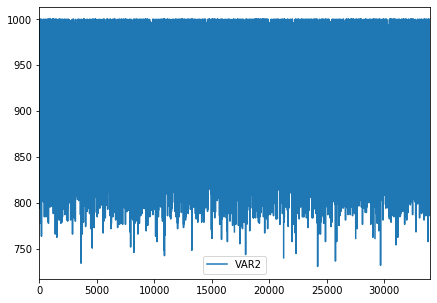

<Figure size 432x288 with 0 Axes>

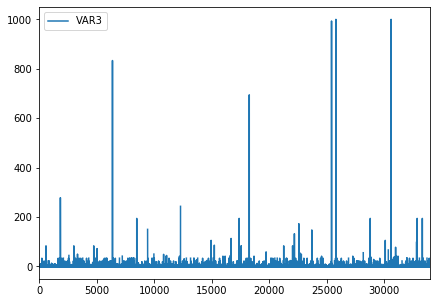

<Figure size 432x288 with 0 Axes>

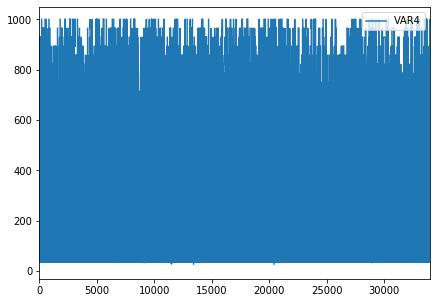

<Figure size 432x288 with 0 Axes>

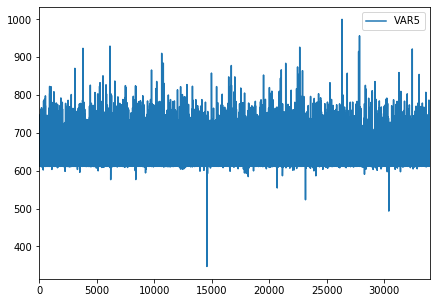

<Figure size 432x288 with 0 Axes>

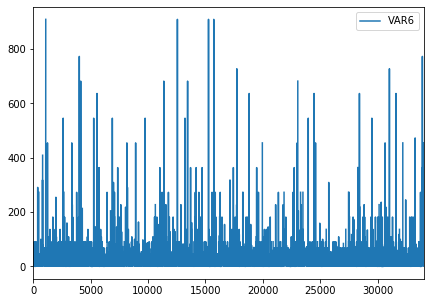

<Figure size 432x288 with 0 Axes>

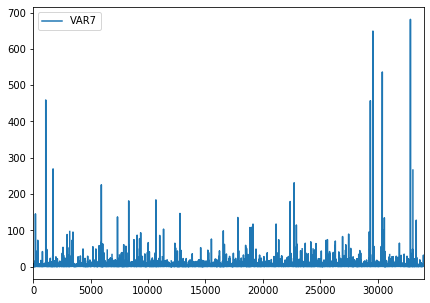

<Figure size 432x288 with 0 Axes>

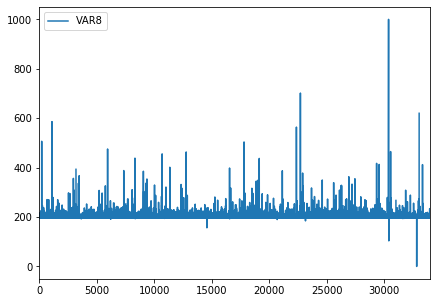

<Figure size 432x288 with 0 Axes>

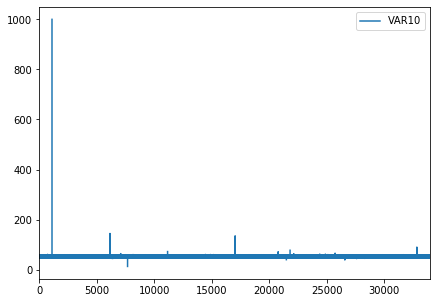

<Figure size 432x288 with 0 Axes>

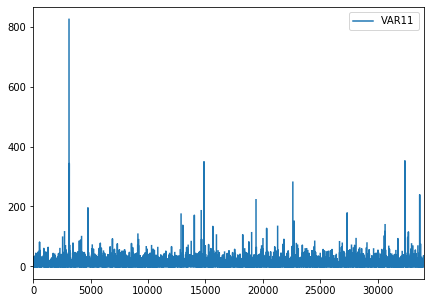

<Figure size 432x288 with 0 Axes>

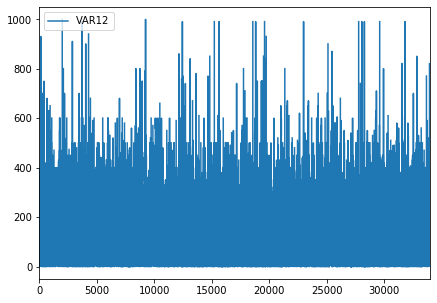

<Figure size 432x288 with 0 Axes>

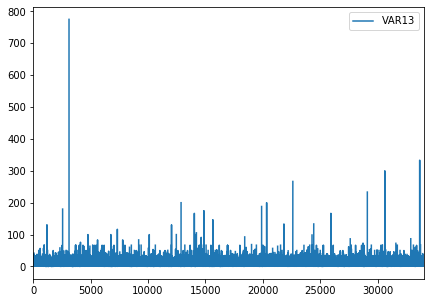

<Figure size 432x288 with 0 Axes>

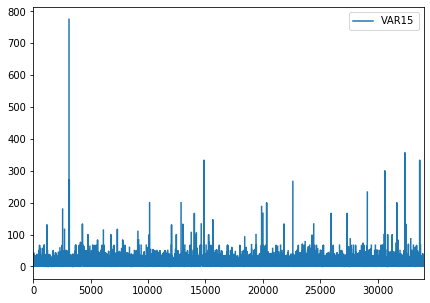

<Figure size 432x288 with 0 Axes>

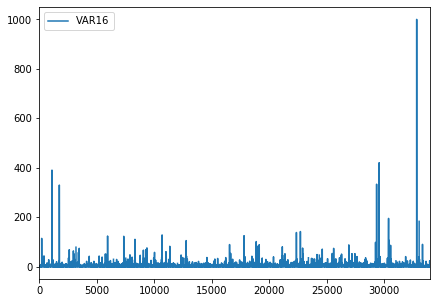

<Figure size 432x288 with 0 Axes>

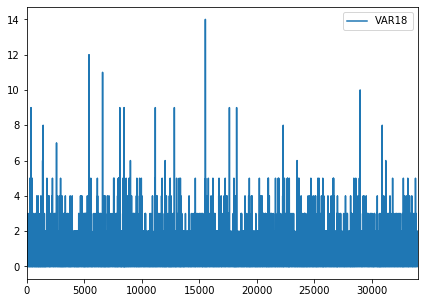

<Figure size 432x288 with 0 Axes>

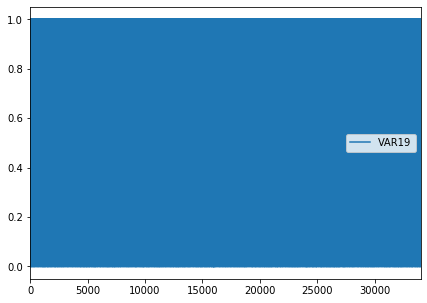

<Figure size 432x288 with 0 Axes>

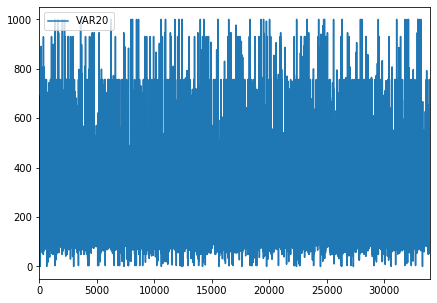

In [29]:
# basic plots
for i in columns:
    plt.figure()
    df_train.plot(y=i,figsize=(7,5))
    #print('Mean',df_train[i].mean())

In [ ]:
for i in columns:
    plt.figure()
    df_train.hist(column=i,figsize=(7,5),normed=True)

In [ ]:
for i in columns:
    plt.figure()
    df_train.boxplot(column = i)

##### Filling Missing values

In [26]:
#Required Imports

from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#from sklearn.impute import SimpleImputer

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Techinques
# 1 - df.fillna()
# 2 - impute using sklearn - mean,meadian,mode
# 3 - interpolation 
# 4 - LDA analysis

In [27]:
# Using TransformerMixin

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


In [28]:
####   df.fillna()
# df_train = df_train.fillna(mean,inplace=True)

####   impute using sklearn - mean,meadian,mode 
imputer_mean = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer_median = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)
imputer_mode = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
df_train.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR10',
       'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR18', 'VAR19',
       'VAR20', 'VAR21'],
      dtype='object')

In [30]:
# #df = df_train[:, 1:3].head()
# X = df_train.iloc[:, 1:-1].values
# y = df_train.iloc[:, 18].values
# print(type(X[:,1][0]))
# print(type(X[:,1]))
# print(type(X[:,11][0]))
# print(type(X[:,11]))
# print(type(X))
# print(type(y))
# print(type(y[0]))

### Training DataSet

##### Imputing using mean

In [31]:
# Imputing column 1 to 11 using mean
imputer_mean = imputer_mean.fit(df_train.iloc[:, 1:12].values)
df_train.iloc[:, 1:12] = imputer_mean.fit_transform(df_train.iloc[:, 1:12].values)

In [49]:
# Imputing column 13 and 14 using mean
imputer_mean = imputer_mean.fit(df_train.iloc[:,13:15].values)
df_train.iloc[:,13:15] = imputer_mean.transform(df_train.iloc[:,13:15].values)

In [33]:
# Imputing VAR 20 using mean
flag20 = df_train['VAR20'].as_matrix().reshape(-1,1)
imputer_mode = imputer_mode.fit(flag20)
flag20 = imputer_mean.transform(flag20)
df_train['VAR20'] = flag20

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


##### Imputing using mode

In [34]:
# Imputing column 15 and 16 by mode
imputer_mode = imputer_mode.fit(df_train.iloc[:,15:16].values)
df_train.iloc[:,15:16] = imputer_mean.transform(df_train.iloc[:,15:16].values)

In [35]:
flag = df_train['VAR14'].as_matrix().reshape(-1,1)
imputer_mode = imputer_mode.fit(flag)
flag = imputer_mean.transform(flag)
df_train['VAR14'] = flag
#imputer_mode = imputer_mode.fit(df_train.iloc[:,12].values.as_matrix().reshape(-1,1))
#df_train.iloc[:,12] = imputer_mean.transform(df_train.iloc[:,12].values)

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


### LeaderBoard Dataset

In [36]:
df_lead.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR10',
       'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR18', 'VAR19',
       'VAR20'],
      dtype='object')

In [37]:
# Imputing column 1 to 11 using mean
imputer_mean = imputer_mean.fit(df_lead.iloc[:, 1:12].values)
df_lead.iloc[:, 1:12] = imputer_mean.fit_transform(df_lead.iloc[:, 1:12].values)

In [50]:
# Imputing column 13 and 14 using mean
imputer_mean = imputer_mean.fit(df_lead.iloc[:,13:15].values)
df_lead.iloc[:,13:15] = imputer_mean.transform(df_lead.iloc[:,13:15].values)

In [39]:
# Imputing VAR 20 using mean
lflag20 = df_lead['VAR20'].as_matrix().reshape(-1,1)
imputer_mode = imputer_mode.fit(lflag20)
lflag20 = imputer_mean.transform(lflag20)
df_lead['VAR20'] = lflag20

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [40]:
# Imputing column 15 and 16 by mode
imputer_mode = imputer_mode.fit(df_lead.iloc[:,15:16].values)
df_lead.iloc[:,15:16] = imputer_mean.transform(df_lead.iloc[:,15:16].values)

In [41]:
lflag = df_lead['VAR14'].as_matrix().reshape(-1,1)
imputer_mode = imputer_mode.fit(lflag)
lflag = imputer_mean.transform(lflag)
df_lead['VAR14'] = lflag
#imputer_mode = imputer_mode.fit(df_train.iloc[:,12].values.as_matrix().reshape(-1,1))
#df_train.iloc[:,12] = imputer_mean.transform(df_train.iloc[:,12].values)

C:\Users\PASHUPATI-PC\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [42]:
type(df_train['VAR14'][0])

numpy.float64

In [43]:
df_train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,58.632548,0.279273,100.083403,1.000000,1.000000,1.000000,1.540594,1.0,0,100.104991,Low
1,2,911.764706,0.027778,248.076201,611.574748,8.181818,1.344479,198.600020,56.497320,5.429062,15.012510,11.679589,1.000000,12.453257,1.614613,0.0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,58.632548,0.453212,210.175146,10.000000,1.000000,10.000000,1.044599,0.0,0,98.249570,Medium
3,4,892.941177,1.119596,248.076201,638.076431,9.090909,0.820218,197.355744,58.632548,5.429062,117.283667,11.679589,1.000000,12.453257,1.145729,1.0,0,140.862306,Low
4,5,914.117647,0.083333,248.076201,626.514988,5.181818,1.372928,198.790477,58.632548,5.429062,210.175146,11.679589,12.453257,12.453257,1.558341,1.0,0,101.268503,High


In [44]:
df_lead.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR18,VAR19,VAR20
0,1,878.823529,0.833333,821.428571,620.835806,5.181818,0.833974,197.500187,58.632548,9.433609,40.033361,10.000000,2.0,10.000000,1.212784,1.0,0,48.099828
1,2,891.764706,0.138889,357.142857,614.092215,3.909091,0.595187,197.016843,58.632548,10.144612,114.775746,5.666667,1.0,7.600000,1.004907,0.0,0,104.018933
2,3,955.294118,0.055556,244.745633,611.574748,6.363636,0.918652,197.660051,56.432554,0.583494,114.775746,6.000000,1.0,6.000000,1.157115,1.0,1,120.586919
3,4,831.764706,0.111111,250.000000,617.740617,6.545455,2.383924,200.526288,48.539365,5.326532,114.775746,11.900945,3.0,12.720950,2.350858,0.0,1,168.592083
4,5,957.647059,0.166667,244.745633,623.426802,15.185077,0.711240,197.151458,49.379748,0.255712,114.775746,13.333333,1.0,13.333333,1.171551,0.0,1,109.204819


In [51]:
n_df_with_any_null_values = df_train[df_train.columns[df_train.isnull().any()].tolist()]

In [52]:
get_percentage_missing(n_df_with_any_null_values)

Series([], dtype: float64)

In [53]:
lead_n_df_with_any_null_values = df_lead[df_lead.columns[df_lead.isnull().any()].tolist()]

In [54]:
get_percentage_missing(lead_n_df_with_any_null_values)

Series([], dtype: float64)

In [55]:
#X
# print(type(X[:,1][0]))
# print(type(X[:,1]))
# print(type(X[:,11][0]))
# print(type(X[:,11]))
# print(type(X))
# print(type(y))
# print(type(y[0]))

##### Label Encoding Categorical data (Target Variable)

In [57]:
X = df_train.iloc[:, 1:-1].values
y = df_train.iloc[:, 18].values

X_lead = df_lead.iloc[:, 1:-1].values
#y_lead = df_lead.iloc[:, 18].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
#X[:, 11] = labelencoder_X.fit_transform(X[:, 11])

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
print(type(X[:,1][0]))
print(type(X[:,1]))
print(type(X[:,11][0]))
print(type(X[:,11]))
print(type(X))
print(type(y[0]))

#### Linear Discremenant Analysis

In [ ]:
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

In [58]:
## Exporting dataframe

df_train.to_csv('without_nan.csv')
df_lead.to_csv('lead_data_w_nan.csv')